In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir="animals"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 5850 images belonging to 91 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Conv2D,Dropout
from keras.layers import BatchNormalization

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(91,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [8]:
history = model.fit(train_ds,epochs= 15, batch_size=32)

Epoch 1/15
 21/183 [==>...........................] - ETA: 6:38 - loss: 4.8124 - accuracy: 0.0518

/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


183/183 [==============================] - 482s 2s/step - loss: 4.3755 - accuracy: 0.0955
Epoch 2/15
183/183 [==============================] - 543s 3s/step - loss: 3.2879 - accuracy: 0.2244
Epoch 3/15
183/183 [==============================] - 461s 3s/step - loss: 2.7563 - accuracy: 0.3367
Epoch 4/15
183/183 [==============================] - 411s 2s/step - loss: 2.2215 - accuracy: 0.4564
Epoch 5/15
183/183 [==============================] - 467s 3s/step - loss: 1.8448 - accuracy: 0.5374
Epoch 6/15
183/183 [==============================] - 574s 3s/step - loss: 1.5383 - accuracy: 0.5964
Epoch 7/15
183/183 [==============================] - 594s 3s/step - loss: 1.2760 - accuracy: 0.6630
Epoch 8/15
183/183 [==============================] - 331s 2s/step - loss: 1.0002 - accuracy: 0.7301
Epoch 9/15
183/183 [==============================] - 319s 2s/step - loss: 0.7883 - accuracy: 0.7808
Epoch 10/15
183/183 [==============================] - 307s 2s/step - loss: 0.6500 - accuracy: 0.8240


In [9]:
model.save('alert.h5')

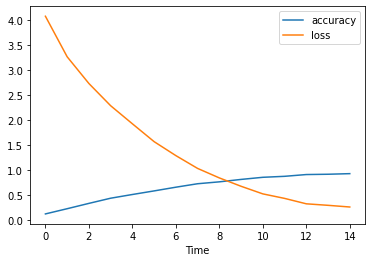

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [12]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from keras.models import load_model
#import image from keras.preprocessing
from keras.preprocessing import image
#loading our saved model file
model = load_model("alert.h5")
img = image.load_img(r"0a37838e99.jpg",target_size=(224,224))

x = image.img_to_array(img)
#expanding the shape of image to 4 dimensions
x = np.expand_dims(x,axis=0)
pred = model.predict_classes(x)
print(classes[np.argmax(pred)])

antelope
